# Spaceship Titanic
## Predict which passengers are transported to an alternate dimension

어떤 승객들이 이상 현상에 의해 이송됐는지 예측하는 컴피티션

In [3]:
!kaggle competitions download -c spaceship-titanic


  0%|          | 0.00/299k [00:00<?, ?B/s]
100%|##########| 299k/299k [00:00<00:00, 11.8MB/s]


In [1]:
import os
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.listdir('c:/data/spaceship-titanic')

['sample_submission.csv', 'test.csv', 'train.csv']

In [72]:
train = pd.read_csv('c:/data/spaceship-titanic/train.csv')
test = pd.read_csv('c:/data/spaceship-titanic/test.csv')

In [22]:
train.info()
train.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1746,1860_01,Europa,False,A/13/P,TRAPPIST-1e,35.0,True,0.0,1.0,0.0,0.0,3156.0,Caiah Headfair,False
1603,1700_02,Europa,False,B/74/S,TRAPPIST-1e,64.0,False,0.0,4.0,0.0,6200.0,622.0,Solaron Waring,False
6098,6443_05,Earth,False,F/1229/S,TRAPPIST-1e,16.0,False,45.0,0.0,622.0,0.0,564.0,Kimena Cartyernan,False
2744,2944_04,Earth,False,G/469/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Terta Nichoan,True
5483,5849_01,Earth,False,F/1208/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,1104.0,Jilley Brightez,False
2922,3166_01,Mars,True,F/657/P,TRAPPIST-1e,NaN,False,NaN,0.0,0.0,0.0,0.0,Morms Cheen,True
6378,6744_04,Mars,True,E/431/P,TRAPPIST-1e,58.0,False,0.0,NaN,0.0,0.0,0.0,Frus Nan,False
5717,6058_01,Mars,False,F/1253/P,55 Cancri e,18.0,False,2904.0,5.0,50.0,0.0,9.0,Yaphex Ecart,False
4097,4371_03,NaN,True,C/158/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Ranon Shricatory,True
4167,4449_01,Mars,False,D/142/S,TRAPPIST-1e,43.0,False,130.0,0.0,870.0,31.0,26.0,Tyog Cla,True


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  
gggg는 승객과 함께하는 그룹을 나타내고, pp는 그룹내에서의 그들의 번호다. 그룹은 대부분 가족이지만, 그렇지 않은 경우도 있음.    
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
승객이 출발한 행성, 일반적으로 영구 거주지임.    
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.    
승객이 항해 기간동안 잠들어 있는지 여부. cryosleep = True인 승객들은 객실에 갇혀있다.    
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.    
deck/num/side 로 구성되어있는 캐빈번호는 승객들이 머무는 곳을 나타냄. side가 P인 경우 좌현, S인 경우 우현    
Destination - The planet the passenger will be debarking to.    
승객이 내릴 행성    
Age - The age of the passenger.    
VIP - Whether the passenger has paid for special VIP service during the voyage.    
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.    
룸 서비스, 푸드 코트, 쇼핑몰, 스파, VR덱에 각각 쓴 금액    
Name - The first and last names of the passenger.    
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.    
승객이 다른 차원으로 이송됐는지 여부, 예측하려는 목표값임.

## Data Cleansing

In [73]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### HomePlanet

그룹이 같으면 출발한 행성이 같은지 확인

In [74]:
train['GroupId'] = train.PassengerId.str.split('_',expand=True)[0]
train['PeopleId'] = train.PassengerId.str.split('_',expand=True)[1]
test['GroupId'] = test.PassengerId.str.split('_',expand=True)[0]
test['PeopleId'] = test.PassengerId.str.split('_',expand=True)[1]

In [75]:
train.loc[train.HomePlanet.isnull(),'PeopleId'].value_counts()

01    141
02     36
03     12
04      6
06      3
05      2
07      1
Name: PeopleId, dtype: int64

In [76]:
train.loc[(train.HomePlanet.isnull())&(train.PeopleId).isin(['02','03','04','05','06','07']),]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,PeopleId
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,0064,02
405,0444_02,NaN,False,F/99/P,TRAPPIST-1e,26.0,True,1869.0,0.0,136.0,0.0,0.0,Colal Curte,False,0444,02
407,0445_02,NaN,False,E/25/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,77.0,715.0,Rice Marshopper,False,0445,02
438,0470_02,NaN,True,F/86/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Jurs Binie,True,0470,02
471,0504_06,NaN,True,B/19/S,55 Cancri e,53.0,False,0.0,0.0,0.0,0.0,0.0,Alheneb Unpasine,True,0504,06
501,0539_03,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Alderak Nalanet,True,0539,03
505,0540_02,NaN,False,F/95/S,TRAPPIST-1e,17.0,False,1471.0,0.0,0.0,45.0,16.0,Rantax Conie,False,0540,02
524,0560_03,NaN,False,F/103/S,TRAPPIST-1e,44.0,False,1440.0,293.0,74.0,32.0,0.0,Annah Josey,True,0560,03
568,0594_02,NaN,False,E/39/S,TRAPPIST-1e,24.0,False,NaN,4.0,0.0,670.0,113.0,Cores Flynner,False,0594,02
737,0772_03,NaN,True,E/56/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Weia Hednigic,True,0772,03


In [77]:
x = train.groupby(['GroupId','HomePlanet'],as_index=False)[['PassengerId']].count()
x

,GroupId,HomePlanet,PassengerId
0,0001,Europa,1
1,0002,Earth,1
2,0003,Europa,2
3,0004,Earth,1
4,0005,Earth,1
...,...,...,...
6102,9275,Europa,3
6103,9276,Europa,1
6104,9278,Earth,1
6105,9279,Earth,1


In [78]:
x[x.duplicated('GroupId',keep=False)]

,GroupId,HomePlanet,PassengerId


GroupId가 동일하면 행선지가 같음. 중복된 GroupId를 찾아서 같은 GroupId의 경우 같은 행선지로 채워줌.

In [79]:
len(train.PassengerId)

8693

In [80]:
planet_dict = x.set_index('GroupId')[['HomePlanet']].T.to_dict('index')

In [81]:
planet_dict

{'HomePlanet': {'0001': 'Europa',
  '0002': 'Earth',
  '0003': 'Europa',
  '0004': 'Earth',
  '0005': 'Earth',
  '0006': 'Earth',
  '0007': 'Earth',
  '0008': 'Europa',
  '0009': 'Mars',
  '0010': 'Earth',
  '0011': 'Earth',
  '0012': 'Earth',
  '0014': 'Mars',
  '0015': 'Earth',
  '0016': 'Mars',
  '0017': 'Earth',
  '0020': 'Earth',
  '0022': 'Mars',
  '0024': 'Europa',
  '0025': 'Earth',
  '0026': 'Europa',
  '0028': 'Mars',
  '0030': 'Earth',
  '0031': 'Mars',
  '0034': 'Europa',
  '0035': 'Mars',
  '0036': 'Earth',
  '0038': 'Earth',
  '0039': 'Earth',
  '0041': 'Earth',
  '0043': 'Europa',
  '0044': 'Earth',
  '0045': 'Mars',
  '0050': 'Earth',
  '0051': 'Earth',
  '0052': 'Earth',
  '0053': 'Earth',
  '0056': 'Europa',
  '0058': 'Earth',
  '0061': 'Earth',
  '0062': 'Earth',
  '0064': 'Mars',
  '0066': 'Earth',
  '0067': 'Earth',
  '0068': 'Mars',
  '0069': 'Earth',
  '0070': 'Earth',
  '0071': 'Earth',
  '0072': 'Earth',
  '0073': 'Mars',
  '0074': 'Europa',
  '0076': 'Mars',
 

In [82]:
tmp = []
for i in train.GroupId:
    if i in planet_dict['HomePlanet']:
        tmp.append(planet_dict['HomePlanet'][i])
    else:
        tmp.append(np.NaN)
tmp

['Europa',
 'Earth',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Earth',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Europa',
 'Earth',
 'Europa',
 'Mars',
 'Earth',
 'Mars',
 'Mars',
 'Mars',
 'Europa',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Europa',
 'Mars',
 'Mars',
 'Europa',
 'Earth',
 'Mars',
 'Mars',
 'Mars',
 'Earth',
 'Europa',
 'Earth',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Eart

In [83]:
train.HomePlanet = tmp

In [84]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,PeopleId
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

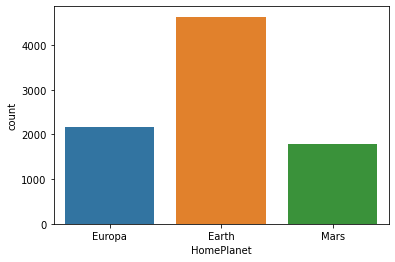

In [85]:
sns.countplot(data=train,x='HomePlanet')

In [86]:
train.HomePlanet.fillna('Earth',inplace=True)

test dataset 결측치 채우기

In [87]:
test.HomePlanet.isnull().sum()

87

In [88]:
x = test.groupby(['GroupId','HomePlanet'],as_index=False)[['PassengerId']].count()
planet_dict_test = x.set_index('GroupId')[['HomePlanet']].T.to_dict('index')
planet_dict_test

{'HomePlanet': {'0013': 'Earth',
  '0018': 'Earth',
  '0019': 'Europa',
  '0021': 'Europa',
  '0023': 'Earth',
  '0027': 'Earth',
  '0029': 'Europa',
  '0032': 'Europa',
  '0033': 'Earth',
  '0037': 'Earth',
  '0040': 'Europa',
  '0042': 'Mars',
  '0046': 'Earth',
  '0047': 'Europa',
  '0048': 'Earth',
  '0049': 'Earth',
  '0054': 'Europa',
  '0055': 'Earth',
  '0057': 'Europa',
  '0059': 'Earth',
  '0060': 'Earth',
  '0063': 'Earth',
  '0065': 'Earth',
  '0075': 'Earth',
  '0079': 'Earth',
  '0080': 'Earth',
  '0083': 'Earth',
  '0087': 'Earth',
  '0089': 'Mars',
  '0093': 'Earth',
  '0094': 'Earth',
  '0095': 'Earth',
  '0096': 'Earth',
  '0100': 'Earth',
  '0104': 'Earth',
  '0106': 'Earth',
  '0109': 'Earth',
  '0117': 'Earth',
  '0118': 'Earth',
  '0121': 'Earth',
  '0124': 'Earth',
  '0125': 'Europa',
  '0130': 'Earth',
  '0131': 'Earth',
  '0132': 'Mars',
  '0135': 'Earth',
  '0137': 'Earth',
  '0142': 'Mars',
  '0143': 'Europa',
  '0145': 'Earth',
  '0150': 'Europa',
  '0153': 

In [89]:
tmp = []
for i in test.GroupId:
    if i in planet_dict_test['HomePlanet']:
        tmp.append(planet_dict_test['HomePlanet'][i])
    else:
        tmp.append(np.NaN)
tmp

['Earth',
 'Earth',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Earth',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Mars',
 'Earth',
 'Earth',
 'Mars',
 'Mars',
 'Mars',
 'Europa',
 'Earth',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Mars',
 'Mars',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Earth',
 'Europa',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Earth',
 'Mars',
 'Mars',
 'Mars',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Europa',
 'Europa',
 'Europa',
 'Earth',
 'Earth',
 'Eur

In [90]:
test.HomePlanet = tmp

In [91]:
test.HomePlanet.isnull().sum()

46

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

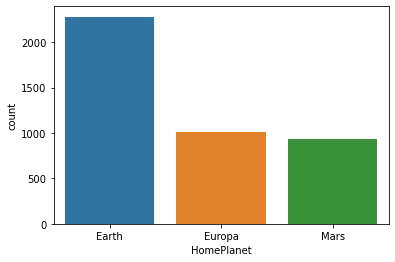

In [92]:
sns.countplot(data=test,x='HomePlanet')

In [93]:
test.HomePlanet.fillna('Earth',inplace=True)

In [94]:
print(f'train HomePlanet the number of null : {train.HomePlanet.isnull().sum()}')
print(f'test HomePlanet the number of null : {test.HomePlanet.isnull().sum()}')

train HomePlanet the number of null : 0
test HomePlanet the number of null : 0


### CryoSleep

In [95]:
train.groupby('CryoSleep')[['PassengerId']].count()

,PassengerId
CryoSleep,
False,5439
True,3037


In [96]:
train.groupby('CryoSleep').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,,,,,,,
False,29.651319,350.146772,713.004316,270.586504,486.09294,475.716165,0.328921
True,27.405415,0.000000,0.000000,0.000000,0.00000,0.000000,0.817583


CryoSleep가 True인 경우 Room Service, FoodCourt, ShoppingMall, Spa, VRDeck에서 사용금액이 0원인 것을 알 수 있다. 모든 청구 금액이 0원인 경우 CryoSleep가 True라고 할 수 있음.

In [97]:
train['FeeTotal'] = train['RoomService'].fillna(0) + train['FoodCourt'].fillna(0) + train['ShoppingMall'].fillna(0) + train['Spa'].fillna(0) + train['VRDeck'].fillna(0)

In [98]:
train.loc[(train['FeeTotal']==0)&(train.CryoSleep.isnull()),'CryoSleep'] = True

In [99]:
train.CryoSleep.fillna(False,inplace=True)

test dataset 채우기

In [100]:
test['FeeTotal'] = test['RoomService'].fillna(0) + test['FoodCourt'].fillna(0) + test['ShoppingMall'].fillna(0) + test['Spa'].fillna(0) + test['VRDeck'].fillna(0)

In [101]:
test.loc[(test['FeeTotal']==0)&(test.CryoSleep.isnull()),'CryoSleep'] = True
test.CryoSleep.fillna(False,inplace=True)

In [102]:
print(f'The number of null of train.CryoSleep : {train.CryoSleep.isnull().sum()}')
print(f'The number of null of test.CryoSleep : {test.CryoSleep.isnull().sum()}')

The number of null of train.CryoSleep : 0
The number of null of test.CryoSleep : 0


### Cabin

In [103]:
train.Cabin.isnull().sum()

199

In [104]:
train['Deck'] = train.Cabin.str.split('/',expand=True)[0]
train['Num'] = train.Cabin.str.split('/',expand=True)[1]
train['Side'] = train.Cabin.str.split('/',expand=True)[2]
test['Deck'] = test.Cabin.str.split('/',expand=True)[0]
test['Num'] = test.Cabin.str.split('/',expand=True)[1]
test['Side'] = test.Cabin.str.split('/',expand=True)[2]

In [105]:
tmp = train[['GroupId','Deck','Side']].groupby(['GroupId','Deck','Side'],as_index=False).count()
deck_dict = tmp.set_index('GroupId')[['Deck','Side']].T.to_dict('index')
deck_dict

{'Deck': {'0001': 'B',
  '0002': 'F',
  '0003': 'A',
  '0004': 'F',
  '0005': 'F',
  '0006': 'G',
  '0007': 'F',
  '0008': 'B',
  '0009': 'F',
  '0010': 'G',
  '0011': 'F',
  '0014': 'F',
  '0015': 'F',
  '0016': 'F',
  '0017': 'G',
  '0020': 'E',
  '0022': 'D',
  '0024': 'C',
  '0025': 'F',
  '0026': 'C',
  '0028': 'F',
  '0030': 'G',
  '0031': 'F',
  '0034': 'D',
  '0035': 'D',
  '0036': 'F',
  '0038': 'F',
  '0039': 'G',
  '0041': 'G',
  '0043': 'B',
  '0044': 'G',
  '0045': 'F',
  '0050': 'E',
  '0051': 'E',
  '0052': 'G',
  '0053': 'F',
  '0056': 'A',
  '0058': 'G',
  '0061': 'F',
  '0062': 'F',
  '0064': 'F',
  '0066': 'G',
  '0067': 'G',
  '0068': 'E',
  '0069': 'F',
  '0070': 'F',
  '0071': 'F',
  '0072': 'F',
  '0073': 'D',
  '0074': 'C',
  '0076': 'F',
  '0077': 'F',
  '0078': 'C',
  '0081': 'G',
  '0082': 'F',
  '0084': 'G',
  '0085': 'C',
  '0086': 'F',
  '0088': 'E',
  '0090': 'G',
  '0091': 'G',
  '0092': 'G',
  '0097': 'A',
  '0098': 'G',
  '0099': 'G',
  '0102': 'F',
  

In [106]:
tmp_deck = []
tmp_side = []
for i in train.GroupId:
    if i in deck_dict['Deck']:
        tmp_deck.append(deck_dict['Deck'][i])
        tmp_side.append(deck_dict['Side'][i])
    else:
        tmp_deck.append(np.NaN)
        tmp_side.append(np.NaN)

In [107]:
train.Deck = tmp_deck
train.Side = tmp_side

In [108]:
train.groupby(['Side'])[['Age','FeeTotal']].agg(['mean','count','std'])

Age                      FeeTotal                   
           mean count        std         mean count          std
Side                                                            
P     28.640681  4169  14.349505  1433.336156  4251  2782.958441
S     28.972706  4250  14.648360  1446.929772  4343  2806.831148

<AxesSubplot:xlabel='Side', ylabel='count'>

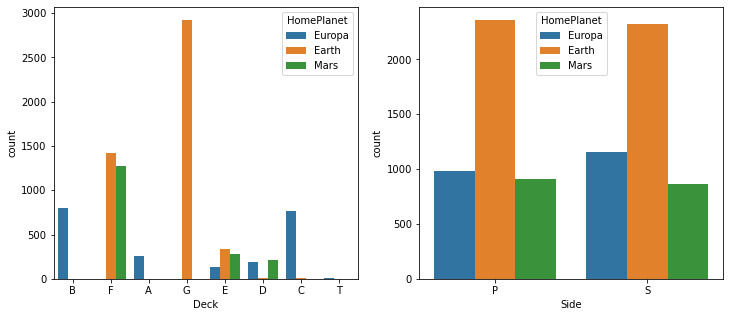

In [109]:
plt.figure(figsize=[12,5])
plt.subplot(121)
sns.countplot(data=train,x='Deck',hue='HomePlanet')
plt.subplot(122)
sns.countplot(data=train,x='Side',hue='HomePlanet')

In [110]:
train.loc[train.Deck.isnull(),'Deck'] = train.loc[train.Deck.isnull(),'HomePlanet'].map({'Earth':'G','Mars':'F','Europa':'B'})

In [111]:
train.groupby(['Deck','Side'],as_index=False)[['PassengerId']].count()

,Deck,Side,PassengerId
0,A,P,121
1,A,S,137
2,B,P,359
3,B,S,437
4,C,P,348
5,C,S,417
6,D,P,212
7,D,S,201
8,E,P,357
9,E,S,390


Null인 Deck을 그룹아이디와 동일한 값으로 넣어주고, 그 이후에도 Null값은 HomePlanet에 따라 최빈도 값으로 넣어줌.

In [112]:
train.loc[train.Side.isnull(),'Side']=train.loc[train.Side.isnull(),'Deck'].map({'A':'S','B':'S','C':'S','D':'P','E':'S','F':'P','G':'S','T':'P'})

Null인 Side값은 그룹아이디와 동일한 값으로 넣어주고, 그 이후에 Null값은 Deck값의 최빈도로 넣어줌.    
Test dataset도 동일한 방법으로 채워줌

In [113]:
print(f'Test dataset의 Deck Null값 : {test.Deck.isnull().sum()}')
print(f'Test dataset의 Side Null값 : {test.Side.isnull().sum()}')

Test dataset의 Deck Null값 : 100
Test dataset의 Side Null값 : 100


In [114]:
tmp = test[['GroupId','Deck','Side']].groupby(['GroupId','Deck','Side'],as_index=False).count()
deck_dict = tmp.set_index('GroupId')[['Deck','Side']].T.to_dict('index')
deck_dict

{'Deck': {'0013': 'G',
  '0018': 'F',
  '0019': 'C',
  '0021': 'C',
  '0023': 'F',
  '0027': 'F',
  '0029': 'B',
  '0032': 'D',
  '0033': 'F',
  '0037': 'F',
  '0040': 'D',
  '0042': 'E',
  '0046': 'G',
  '0047': 'B',
  '0048': 'G',
  '0049': 'E',
  '0054': 'B',
  '0055': 'G',
  '0057': 'C',
  '0059': 'E',
  '0060': 'F',
  '0063': 'G',
  '0065': 'G',
  '0075': 'G',
  '0079': 'G',
  '0080': 'G',
  '0083': 'G',
  '0087': 'E',
  '0089': 'F',
  '0093': 'G',
  '0094': 'G',
  '0095': 'F',
  '0096': 'F',
  '0100': 'G',
  '0104': 'F',
  '0106': 'F',
  '0109': 'F',
  '0117': 'E',
  '0118': 'G',
  '0121': 'F',
  '0124': 'G',
  '0125': 'B',
  '0130': 'G',
  '0131': 'F',
  '0132': 'D',
  '0135': 'F',
  '0137': 'G',
  '0142': 'F',
  '0143': 'C',
  '0145': 'E',
  '0150': 'B',
  '0153': 'F',
  '0154': 'G',
  '0155': 'F',
  '0156': 'F',
  '0157': 'A',
  '0158': 'F',
  '0159': 'F',
  '0161': 'F',
  '0162': 'F',
  '0166': 'G',
  '0168': 'C',
  '0175': 'G',
  '0176': 'F',
  '0180': 'F',
  '0184': 'E',
  

In [115]:
tmp_deck = []
tmp_side = []
for i in test.GroupId:
    if i in deck_dict['Deck']:
        tmp_deck.append(deck_dict['Deck'][i])
        tmp_side.append(deck_dict['Side'][i])
    else:
        tmp_deck.append(np.NaN)
        tmp_side.append(np.NaN)

In [116]:
test.Deck = tmp_deck
test.Side = tmp_side

In [117]:
print(f'Test dataset의 Deck Null값 : {test.Deck.isnull().sum()}')
print(f'Test dataset의 Side Null값 : {test.Side.isnull().sum()}')

Test dataset의 Deck Null값 : 63
Test dataset의 Side Null값 : 63


<AxesSubplot:xlabel='Side', ylabel='count'>

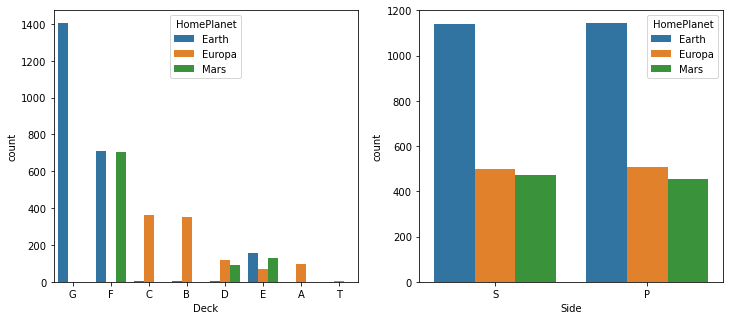

In [118]:
plt.figure(figsize=[12,5])
plt.subplot(121)
sns.countplot(data=test,x='Deck',hue='HomePlanet')
plt.subplot(122)
sns.countplot(data=test,x='Side',hue='HomePlanet')

In [119]:
test.loc[test.Deck.isnull(),'Deck'] = test.loc[test.Deck.isnull(),'HomePlanet'].map({'Earth':'G','Mars':'F','Europa':'B'})
test.loc[test.Side.isnull(),'Side']=test.loc[test.Side.isnull(),'Deck'].map({'A':'S','B':'S','C':'S','D':'P','E':'S','F':'P','G':'S','T':'P'})

### Destination

In [120]:
print(f'Train dataset의 Destination null의 수 : {train.Destination.isnull().sum()}')

Train dataset의 Destination null의 수 : 182


In [121]:
x = train.groupby(['GroupId','Destination'],as_index=False)[['PassengerId']].count()
x[x.duplicated('GroupId',keep=False)]

,GroupId,Destination,PassengerId
7,0008,55 Cancri e,2
8,0008,TRAPPIST-1e,1
16,0017,55 Cancri e,1
17,0017,TRAPPIST-1e,1
18,0020,55 Cancri e,2
...,...,...,...
6844,9227,TRAPPIST-1e,3
6846,9231,55 Cancri e,1
6847,9231,TRAPPIST-1e,2
6878,9280,55 Cancri e,1


GroupId가 동일하다고 목적지가 동일하지 않음

In [122]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [123]:
train.groupby(['HomePlanet','Destination'])[['GroupId']].count()

GroupId
HomePlanet Destination           
Earth      55 Cancri e        710
           PSO J318.5-22      727
           TRAPPIST-1e       3205
Europa     55 Cancri e        896
           PSO J318.5-22       19
           TRAPPIST-1e       1209
Mars       55 Cancri e        194
           PSO J318.5-22       50
           TRAPPIST-1e       1501

<AxesSubplot:xlabel='Side', ylabel='count'>

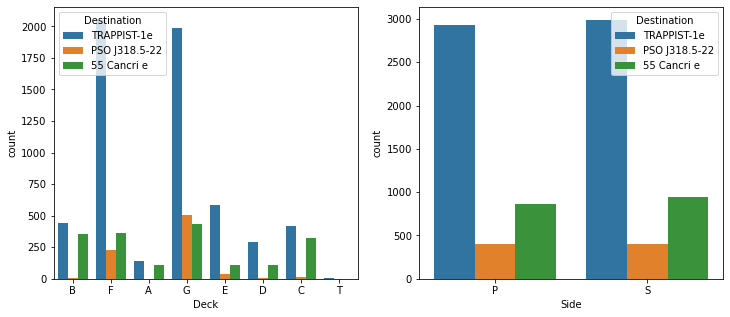

In [124]:
plt.figure(figsize=[12,5])
plt.subplot(121)
sns.countplot(data=train,x='Deck',hue='Destination')
plt.subplot(122)
sns.countplot(data=train,x='Side',hue='Destination')

In [125]:
train.Destination.fillna('TRAPPIST-1e',inplace=True)

In [126]:
print(f'Test dataset의 Destination null의 수 : {test.Destination.isnull().sum()}')

Test dataset의 Destination null의 수 : 92


In [127]:
test.Destination.fillna('TRAPPIST-1e',inplace=True)

In [128]:
print(f'Test dataset의 Destination null의 수 : {test.Destination.isnull().sum()}')

Test dataset의 Destination null의 수 : 0


### Age

In [129]:
print(f'Train dataset null의 값 : {train.Age.isnull().sum()}')
print(f'Test dataset null의 값 : {test.Age.isnull().sum()}')

Train dataset null의 값 : 179
Test dataset null의 값 : 91


In [130]:
train.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

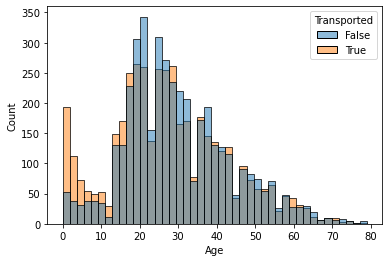

In [131]:
sns.histplot(data=train,x='Age',hue='Transported')

In [132]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,PeopleId,FeeTotal,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,8536.0,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,0.0,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,1873.0,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,4637.0,E,608,S


In [133]:
train.groupby(['VIP','Deck'],as_index=False)[['Age']].agg(['count','median','mean','std'])

Age                             
           count median       mean        std
VIP   Deck                                   
False A      208   34.0  34.966346  13.789088
      B      747   32.0  33.277108  13.094400
      C      685   33.0  34.816058  13.388527
      D      374   32.0  33.679144  12.699612
      E      701   28.0  30.175464  13.021818
      F     2557   25.0  28.183027  13.415392
      G     2842   23.0  24.823012  15.322234
      T        5   37.0  37.000000   3.391165
True  A       36   35.0  37.277778   8.788340
      B       43   36.0  39.558140  12.906813
      C       43   36.0  37.697674  11.417478
      D       26   34.0  35.576923   7.900243
      E       15   34.0  36.400000  13.113788
      F       35   30.0  36.571429  14.441129

In [134]:
train.Age.fillna(train.groupby(['VIP','Deck']).Age.transform('median'), inplace=True)
test.Age.fillna(train.groupby(['VIP','Deck']).Age.transform('median'), inplace=True)

In [135]:
train.Age.fillna(train.groupby(['Deck']).Age.transform('median'), inplace=True)

In [136]:
print(f'Train dataset null의 값 : {train.Age.isnull().sum()}')
print(f'Test dataset null의 값 : {test.Age.isnull().sum()}')

Train dataset null의 값 : 0
Test dataset null의 값 : 0


### VIP

In [137]:
print(f'Train dataset VIP Null의 수 : {train.VIP.isnull().sum()}')
print(f'Test dataset VIP Null의 수 : {test.VIP.isnull().sum()}')

Train dataset VIP Null의 수 : 203
Test dataset VIP Null의 수 : 93


In [138]:
train.groupby('VIP',as_index=False)[['FeeTotal']].describe()

FeeTotal                                                                
     count         mean          std  min     25%     50%     75%      max
0   8291.0  1371.504644  2683.701966  0.0     0.0   705.0  1369.0  35987.0
1    199.0  4425.477387  5121.300417  0.0  1281.0  2767.0  6120.5  31076.0

<AxesSubplot:xlabel='VIP', ylabel='FeeTotal'>

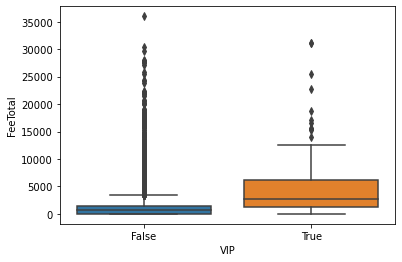

In [139]:
sns.boxplot(data=train,x='VIP',y='FeeTotal')

<AxesSubplot:xlabel='Destination', ylabel='count'>

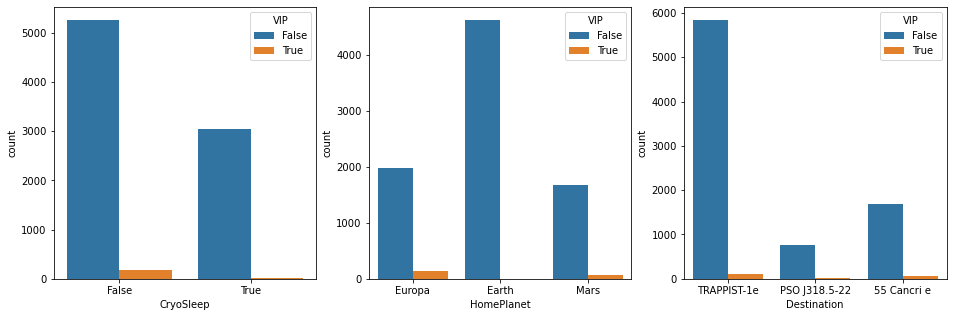

In [140]:
plt.figure(figsize=[16,5])
plt.subplot(131)
sns.countplot(data=train,x='CryoSleep',hue='VIP')
plt.subplot(132)
sns.countplot(data=train,x='HomePlanet',hue='VIP')
plt.subplot(133)
sns.countplot(data=train,x='Destination',hue='VIP')

In [141]:
train.groupby(['HomePlanet','Destination'],as_index=False)[['VIP']].agg(['mean','count'])

VIP      
                              mean count
HomePlanet Destination                  
Earth      55 Cancri e    0.001456   687
           PSO J318.5-22  0.000000   707
           TRAPPIST-1e    0.000619  3233
Europa     55 Cancri e    0.072727   880
           PSO J318.5-22  0.526316    19
           TRAPPIST-1e    0.047541  1220
Mars       55 Cancri e    0.000000   190
           PSO J318.5-22  0.166667    48
           TRAPPIST-1e    0.037185  1506

In [142]:
train.groupby(['HomePlanet'],as_index=False)[['VIP']].mean()

,HomePlanet,VIP
0,Earth,0.000648
1,Europa,0.062294
2,Mars,0.036697


HomePlanet이 Europa인 경우 VIP일 확률이 높고, 이때 FeeTotal이 1369이상인 경우 VIP로 간주 후 나머지는 VIP가 아닌걸로 간주함.

In [143]:
train.loc[(train.VIP.isnull())&(train.HomePlanet=='Europa')&(train.FeeTotal>=1369),'VIP'] = True
test.loc[(test.VIP.isnull())&(test.HomePlanet=='Europa')&(test.FeeTotal>=1369),'VIP'] = True

In [144]:
print(f'Train dataset VIP Null의 수 : {train.VIP.isnull().sum()}')
print(f'Test dataset VIP Null의 수 : {test.VIP.isnull().sum()}')

Train dataset VIP Null의 수 : 182
Test dataset VIP Null의 수 : 77


In [145]:
train.VIP.fillna(False,inplace=True)
test.VIP.fillna(False,inplace=True)

In [146]:
print(f'Train dataset VIP Null의 수 : {train.VIP.isnull().sum()}')
print(f'Test dataset VIP Null의 수 : {test.VIP.isnull().sum()}')

Train dataset VIP Null의 수 : 0
Test dataset VIP Null의 수 : 0


## Convert Data

In [200]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [156]:
data = [train, test]

In [184]:
train.FeeTotal.describe()

count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: FeeTotal, dtype: float64

In [188]:
train['AgeBin'] = pd.cut(train['Age'].astype(int),8)
test['AgeBin'] = pd.cut(test['Age'].astype(int),8)
train['FeeBin'] = pd.cut(train['FeeTotal'],5)
test['FeeBin'] = pd.cut(test['FeeTotal'],5)

In [216]:
label = LabelEncoder()
for dataset in data:
    dataset['HomePlanet_code'] = label.fit_transform(dataset['HomePlanet'])
    dataset['CryoSleep_code'] = label.fit_transform(dataset['CryoSleep'])
    dataset['Destination_code'] = label.fit_transform(dataset['Destination'])
    dataset['VIP_code'] = label.fit_transform(dataset['VIP'])
    dataset['PeopleId_code'] = label.fit_transform(dataset['PeopleId'])
    dataset['Deck_code'] = label.fit_transform(dataset['Deck'])
    dataset['Side_code'] = label.fit_transform(dataset['Side'])
    dataset['AgeBin_code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FeeBin_code'] = label.fit_transform(dataset['FeeBin'])

In [232]:
train['Transported'] = train['Transported'].map({1:True,0:False})

In [218]:
Target = ['Transported']
data_x_bin = ['HomePlanet_code','CryoSleep_code','Destination_code','VIP_code','PeopleId_code','Deck_code','Side_code','AgeBin_code','FeeBin_code']
data_xy = Target + data_x_bin

## Model Selection

In [225]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

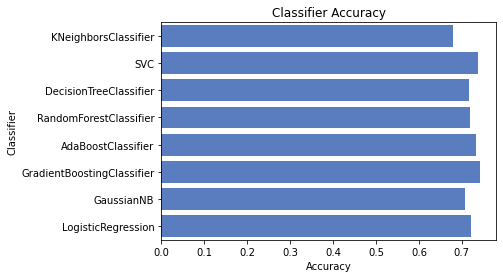

In [236]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

log_cols = ['Classifier','Accuracy']
log = DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1, random_state=0)

acc_dict = {}

X = train[data_x_bin]
y = train[Target]

for train_idx,test_idx in sss.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train,y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test,train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [237]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.679195
0,SVC,0.736897
0,DecisionTreeClassifier,0.715632
0,RandomForestClassifier,0.719540
0,AdaBoostClassifier,0.732759
0,GradientBoostingClassifier,0.743103
0,GaussianNB,0.706552
0,LogisticRegression,0.722184


In [233]:
train_x, test_x, train_y, test_y = train_test_split(train[data_x_bin],train[Target],random_state=0)

In [226]:
estimators = [
    ('svm',SVC(probability=True)),
    ('gbc',GradientBoostingClassifier())
]

clf_stkg = StackingClassifier(
    estimators=estimators, final_estimator=AdaBoostClassifier())
clf_stkg.fit(train_x,train_y)

#데이터 예측
pred_stkg = clf_stkg.predict(test_x)

#정확도 평가
accuracy = accuracy_score(test_y,pred_stkg)
print('accuracy : {}'.format(accuracy))

#confusion matrix 확인
conf_matrix = confusion_matrix(test_y,pred_stkg)
print('confusion matrix : \n{}'.format(conf_matrix))

#분류 리포트 확인
class_report = classification_report(test_y,pred_stkg)
print('분류 리포트 : \n{}'.format(class_report))

accuracy : 0.7359705611775529
confusion matrix : 
[[912 165]
 [409 688]]
분류 리포트 : 
              precision    recall  f1-score   support

       False       0.69      0.85      0.76      1077
        True       0.81      0.63      0.71      1097

    accuracy                           0.74      2174
   macro avg       0.75      0.74      0.73      2174
weighted avg       0.75      0.74      0.73      2174



## Prediciton

GradientBoostingClassifier가 가장 높은 정확도를 보여 해당 모델로 확정함.

In [238]:
model = GradientBoostingClassifier()
model.fit(X,y)
result = model.predict(test[data_x_bin])

In [239]:
result

array([ True, False,  True, ...,  True, False,  True])

In [241]:
submission = DataFrame({'PassengerId':test['PassengerId'],
                       'Transported':result})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [242]:
submission.to_csv('c:/data/spaceship-titanic/submission.csv',index=False)